## Instalação e importação das bibliotecas

In [ ]:
!pip install plotly==5.3.1

import numpy as np
import pandas as pd
import plotly as pl
import plotly.graph_objects as go
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning
import plotly.express as px 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Questão 1 - Regressão Linear Simples

## Importação dos dados

In [ ]:
df1 = pd.read_csv('Salary_Data.csv')

## Análise Inicial

In [ ]:
# Cabeçalho
df1.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# Rodapé
df1.tail(10)

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [ ]:
# Número de linhas e colunas
df1.shape

(30, 2)

In [ ]:
# Tipo dos dados
df1.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
# Dados faltantes
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# Estatística descritiva
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Visualização

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x            = df1['YearsExperience'],
        y            = df1['Salary'],
        mode         = 'markers',
        marker       = {'size': 10},
    )
)

fig.update_layout(
    title            = 'Salário por Tempo de Experiência</i></sup>',
    title_font_color = 'gray',
    title_font_size  = 20,
    width            = 1000,
    height           = 500,
    margin           = {'l': 30, 'r': 30, 't': 100, 'b': 30},
    plot_bgcolor     = 'white',
    font_color       = 'gray',
    xaxis1           = {
        'showline': True,
        'title': 'Tempo de Experiência (Anos)',
        'showticklabels': True,
        'range': [0, 12],
        'tickmode': 'array',
        'tickvals': list(range(1, 13)),
        'gridcolor': 'whitesmoke'
    },
    yaxis1           = {
        'showline': True,
        'title': 'Salário',
        'showticklabels': True,
        'range': [0, 150000],
        'gridcolor': 'whitesmoke'
    }
)

fig.show()

## Modelo de regressão linear simples

In [ ]:
regressao1 = smf.ols('Salary ~ YearsExperience', data = df1).fit()

In [ ]:
residuos1 = regressao1.resid

## Normalidade dos dados

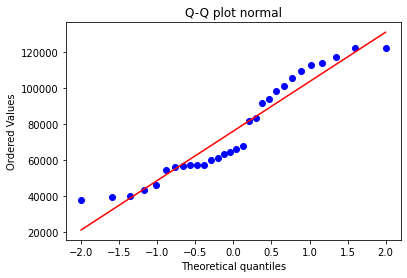

In [ ]:
# Q-Q plot

stats.probplot(df1['Salary'], dist='norm', plot=plt)
plt.title('Q-Q plot normal')
plt.show()

In [ ]:
# Teste de Shapiro-Wilk

estatistica, p = stats.shapiro(df1['Salary'])
print('Estatistica de teste: {}'.format(estatistica))
print('p-valor:{}'.format(p))

Estatistica de teste: 0.9103151559829712
p-valor:0.015155306085944176


A distribuição dos pontos observada no Q-Q plot seguiu razoavelmente uma função linear, permitindo a validação por meios visuais da normalidade dos dados. Pelo teste de Shapiro-Wilk, considerando uma significância de 5%, rejeita-se a hipótese nula de que se trata de uma distribuição normal, já que o p-valor foi menor que 0,05. Portanto, o teste não valida positivamente a premissa da normalidade.

## Normalidade dos resíduos

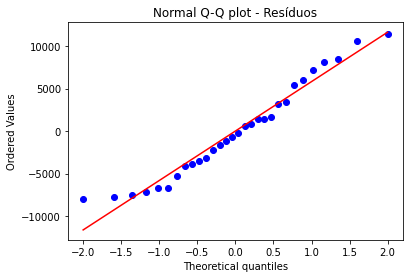

In [ ]:
# Q-Q plot

stats.probplot(residuos1, dist='norm', plot=plt)
plt.title('Normal Q-Q plot - Resíduos')
plt.show()

In [ ]:
# Teste de Shapiro-Wilk

estatistica, p = stats.shapiro(residuos1)
print('Estatistica de teste: {}'.format(estatistica))
print('p-valor:{}'.format(p))

Estatistica de teste: 0.9523388147354126
p-valor:0.1952173411846161


A distribuição dos pontos observada no Q-Q plot dos resíduos seguiu razoavelmente uma função linear, permitindo a validação por meios visuais da normalidade dos resíduos. Pelo teste de Shapiro-Wilk, considerando uma significância de 5%, não rejeita a hipótese nula de que se trata de uma distribuição normal, já que o p-valor foi maior que 0,05. Portanto, o teste valida positivamente a premissa da normalidade dos resíduos.

## Correlação dos dados

In [ ]:
# Teste de Spearman (distribuição não normal)

coef, p = stats.spearmanr(df1['YearsExperience'], df1['Salary'])
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9568313543516997
p-valor: 1.466992893885873e-16


Pelo teste de Spearman, considerando uma significância de 5%, rejeita-se a hipótese nula de que não há correlação linear, já que o p-valor foi menor que 0.05. Portanto, há correlação linear.

## Homocedasticidade dos resíduos

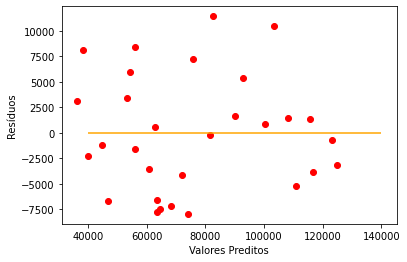

In [ ]:
# Plot de dispersão dos resíduos

plt.scatter(y=residuos1, x=regressao1.predict(), color='red')
plt.hlines(y=0, xmin=40000, xmax=140000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

In [ ]:
#Teste Breusch-Pagan

estatistica, p, f, fp = sms.het_breuschpagan(residuos1, regressao1.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 0.39905327766501575
p-valor: 0.5275785890839358
f-valor: 0.37747075725080226
f_p-valor: 0.5439204509328552


A distribuição dos pontos observada na dispersão dos resíduos aparenta ser aleatória, permitindo a validação por meios visuais da homocedasticidade dos resíduos. Pelo teste de Breusch-Pagan, considerando uma significância de 5%, não se rejeita a hipótese nula de que há homocedasticidade, já que o p-valor foi maior que 0,05. Portanto, o teste valida positivamente a premissa da homocedasticidade dos resíduos.

## Outliers nos resíduos

In [ ]:
outliers1 = regressao1.outlier_test()

In [ ]:
outliers1.max()

student_resid    2.138298
unadj_p          0.974889
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers1.min()

student_resid   -1.423914
unadj_p          0.041696
bonf(p)          1.000000
dtype: float64

Como não foram obtidos valores menores que -3 e maiores que 3 no teste de outliers, não houve presença de outliers nos resíduos. Portanto, o teste valida positivamente a premissa da ausência de outliers nos resíduos.

## Independência dos resíduos

In [ ]:
# Teste de Durbin-Watson

estatistica = statsmodels.stats.stattools.durbin_watson(residuos1)
print('Estatística de teste: {}'.format(estatistica))

Estatística de teste: 1.6479910076183397


A estatística de teste do teste de Durbin-Watson é próxima de 2, indicando baixa autocorrelação da amostra de resíduos. Portanto, o teste valida positivamente a premissa da independência dos resíduos.

## Análise do modelo

In [ ]:
print(regressao1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.14e-20
Time:                        22:03:16   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

Adjusted R-squared alto -> alto poder de explicação

p_valor da estatística F < 0.05 -> modelo de regressão válido estatisticamente

p_valor para coeficientes < 0.05 -> estatisticamente significativos


---


**Equação:**

y = bo + b1*x + erro

Salary ~= 25790 + 9450 * YearsExperience

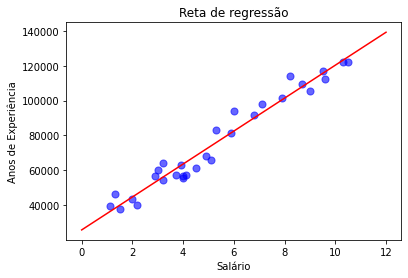

In [ ]:
plt.scatter(y=df1['Salary'], x=df1['YearsExperience'], color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0,12)
plt.plot(X_plot, regressao1.params[0] + regressao1.params[1]*X_plot, color='r')
plt.title('Reta de regressão')
plt.ylabel('Anos de Experiência')
plt.xlabel('Salário')
plt.show()

# Questão 2 - Regressão Linear Múltipla

## Importação dos dados

In [ ]:
df2 = pd.read_csv('kc_house_data.csv')

## Análise Inicial

In [ ]:
# Cabeçalho
df2.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
# Rodapé
df2.tail(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21593,8672200110,20150317T000000,1088000.0,5,3.75,4170,8142,2.0,0,2,...,10,4170,0,2006,0,98056,47.5354,-122.181,3030,7980
21594,5087900040,20141017T000000,350000.0,4,2.75,2500,5995,2.0,0,0,...,8,2500,0,2008,0,98042,47.3749,-122.107,2530,5988
21595,1972201967,20141031T000000,520000.0,2,2.25,1530,981,3.0,0,0,...,8,1480,50,2006,0,98103,47.6533,-122.346,1530,1282
21596,7502800100,20140813T000000,679950.0,5,2.75,3600,9437,2.0,0,0,...,9,3600,0,2014,0,98059,47.4822,-122.131,3550,9421
21597,191100405,20150421T000000,1575000.0,4,3.25,3410,10125,2.0,0,0,...,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125
21598,8956200760,20141013T000000,541800.0,4,2.50,3118,7866,2.0,0,2,...,9,3118,0,2014,0,98001,47.2931,-122.264,2673,6500
21599,7202300110,20140915T000000,810000.0,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21600,249000205,20141015T000000,1537000.0,5,3.75,4470,8088,2.0,0,0,...,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964
21601,5100403806,20150407T000000,467000.0,3,2.50,1425,1179,3.0,0,0,...,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253
21602,844000965,20140626T000000,224000.0,3,1.75,1500,11968,1.0,0,0,...,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303


In [ ]:
# Número de linhas e colunas
df2.shape

(21613, 21)

In [ ]:
# Tipo dos dados
df2.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Dados faltantes
df2.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Estatística descritiva
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# Correlação de Pearson
df2.corr(method='pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


## Modelo de regressão linear múltipla

In [ ]:
regressao2 = smf.ols('price ~ sqft_living + grade + bathrooms + bedrooms', data = df2).fit()

In [ ]:
residuos2 = regressao2.resid

## Normalidade dos resíduos

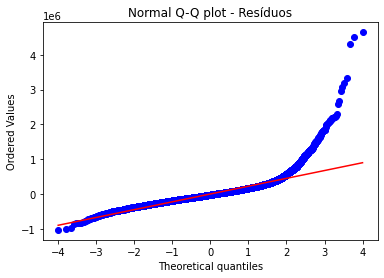

In [ ]:
# Q-Q plot

stats.probplot(residuos2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

In [ ]:
# Teste de Shapiro-Wilk

estatistica, p = stats.shapiro(residuos2)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.8213439583778381
p-valor: 0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



A distribuição dos pontos observada no Q-Q plot não seguiu uma função linear, não permitindo a validação por meios visuais da normalidade dos dados. Pelo teste de Shapiro-Wilk, considerando uma significância de 5%, rejeita-se a hipótese nula de que se trata de uma distribuição normal, já que o p-valor foi menor que 0,05. Portanto, o teste não valida positivamente a premissa da normalidade dos resíduos.

## Homocedasticidade dos resíduos

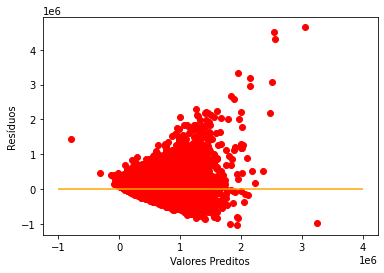

In [ ]:
# Plot de dispersão dos resíduos

plt.scatter(y=residuos2, x=regressao2.predict(), color='red')
plt.hlines(y=0, xmin=-1000000, xmax=4000000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

In [ ]:
#Teste Breusch-Pagan

estatistica, p, f, fp = sms.het_breuschpagan(residuos2, regressao2.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 2361.855717507909
p-valor: 0.0
f-valor: 662.7525303823695
f_p-valor: 0.0


A distribuição dos pontos observada na dispersão dos resíduos não aparenta ser aleatória, não permitindo a validação por meios visuais da homocedasticidade dos resíduos. Pelo teste de Breusch-Pagan, considerando uma significância de 5%, rejeita-se a hipótese nula de que há homocedasticidade, já que o p-valor foi menor que 0,05. Portanto, o teste não valida positivamente a premissa da homocedasticidade dos resíduos.

## Outliers nos resíduos

In [ ]:
outliers2 = regressao2.outlier_test()

In [ ]:
outliers2.max()

student_resid    18.964486
unadj_p           0.999916
bonf(p)           1.000000
dtype: float64

In [ ]:
outliers2.min()

student_resid   -4.165001e+00
unadj_p          1.485403e-79
bonf(p)          3.210402e-75
dtype: float64

Como foram obtidos valores menores que -3 e maiores que 3 no teste de outliers, houve presença de outliers nos resíduos. Portanto, o teste não valida positivamente a premissa da ausência de outliers nos resíduos.

## Independência dos resíduos

In [ ]:
# Teste de Durbin-Watson

estatistica = statsmodels.stats.stattools.durbin_watson(residuos2)
print('Estatística de teste: {}'.format(estatistica))

Estatística de teste: 1.9818304796750963


A estatística de teste do teste de Durbin-Watson é próxima de 2, indicando baixa autocorrelação da amostra de resíduos. Portanto, o teste valida positivamente a premissa da independência dos resíduos.

## Ausência de multicolinearidade

In [ ]:
variaveis2 = df2[['sqft_living','grade','bathrooms','bedrooms']]

In [ ]:
variaveis2.head()

,sqft_living,grade,bathrooms,bedrooms
0,1180,7,1.00,3
1,2570,7,2.25,3
2,770,6,1.00,2
3,1960,7,3.00,4
4,1680,8,2.00,3


In [ ]:
# Cálculo de correlação de Pearson

correlacoes2 = variaveis2.corr(method='pearson')
correlacoes2

,sqft_living,grade,bathrooms,bedrooms
sqft_living,1.000000,0.762704,0.754665,0.576671
grade,0.762704,1.000000,0.664983,0.356967
bathrooms,0.754665,0.664983,1.000000,0.515884
bedrooms,0.576671,0.356967,0.515884,1.000000


In [ ]:
# Cálculo de VIF

vif = add_constant(variaveis2)
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



const          77.881919
sqft_living     3.789380
grade           2.600752
bathrooms       2.522056
bedrooms        1.593629
dtype: float64

Como os valores da matriz de correlação são menores que 0,9 entre todas as variáveis, considera-se a ausência de multicolinearidade. Como os valores da VIF são menores que 5 para todas as variáveis, considera-se a ausência de multicolinearidade.

## Análise do modelo

In [ ]:
print(regressao2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6428.
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        22:07:00   Log-Likelihood:            -2.9913e+05
No. Observations:               21613   AIC:                         5.983e+05
Df Residuals:                   21608   BIC:                         5.983e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.784e+05   1.49e+04    -32.121      

Adjusted R-squared baixo -> baixo poder de explicação

p_valor da estatística F < 0.05 -> modelo de regressão válido estatisticamente

p_valor para coeficientes < 0.05 -> estatisticamente significativos



---


**Equação**:

y = bo + b1*x + b2*x + b3*x + b4*x + erro

price ~= -478400 + 227 * sqft_living + 96140 * grade - 26740 * bathrooms - 39310 * bedrooms

In [ ]:
# Criação de coluna de previsão

df2['valor'] = df2['price']
df2['previsao'] = regressao2.fittedvalues

In [ ]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,valor,previsao
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0,317355.323125
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0,598980.415845
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0,167595.021046
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0,401362.693292
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0,500081.671329


# Questão 3 - Regressão Logística

## Importação dos dados

In [ ]:
# Formato do arquivo alterado para .csv
df3 = pd.read_csv('fertility_Diagnosis.csv', header=None)

## Análise Inicial

In [ ]:
# Cabeçalho
df3.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [ ]:
df3.columns = ['season', 'age', 'childdisease', 'accident', 'surgery', 'fever', 'alcohol', 'smoking', 'sitting', 'diagnosis']

In [ ]:
# Cabeçalho
df3.head(10)

,season,age,childdisease,accident,surgery,fever,alcohol,smoking,sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,N
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,N


In [ ]:
# Rodapé
df3.tail(10)

,season,age,childdisease,accident,surgery,fever,alcohol,smoking,sitting,diagnosis
90,-0.33,0.81,1,1,1,1,0.8,-1,0.38,N
91,0.33,0.78,1,0,0,0,1.0,1,0.06,N
92,0.33,0.75,1,1,0,0,0.8,-1,0.38,N
93,0.33,0.75,1,0,1,0,0.8,-1,0.44,O
94,1.00,0.58,1,0,0,0,0.6,1,0.50,N
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N
99,-1.00,0.69,0,1,1,0,0.6,-1,0.19,N


In [ ]:
# Número de linhas e colunas
df3.shape

(100, 10)

In [ ]:
# Tipo dos dados
df3.dtypes

season          float64
age             float64
childdisease      int64
accident          int64
surgery           int64
fever             int64
alcohol         float64
smoking           int64
sitting         float64
diagnosis        object
dtype: object

In [ ]:
# Dados faltantes
df3.isnull().sum()

season          0
age             0
childdisease    0
accident        0
surgery         0
fever           0
alcohol         0
smoking         0
sitting         0
diagnosis       0
dtype: int64

### Análise de 'Frequência de consumo de álcool'

In [ ]:
df3['alcohol'].value_counts()

1.0    40
0.8    39
0.6    19
0.2     1
0.4     1
Name: alcohol, dtype: int64

In [ ]:
df3['alcohol'] = df3['alcohol'].astype('category')

In [ ]:
px.pie(df3, names='alcohol', title='Frequência de consumo de álcool') 

### Análise de 'Hábito de fumar'

In [ ]:
df3['smoking'].value_counts()

-1    56
 0    23
 1    21
Name: smoking, dtype: int64

In [ ]:
df3['smoking'] = df3['smoking'].astype('category')

In [ ]:
px.pie(df3, names='smoking', title='Hábito de fumar')

### Análise de 'Diagnóstico'

In [ ]:
df3['diagnosis'] = df3['diagnosis'].replace({'N':"Normal", 'O':"Alterado"})

In [ ]:
df3['diagnosis'].value_counts()

Normal      88
Alterado    12
Name: diagnosis, dtype: int64

In [ ]:
df3['diagnosis'] = df3['diagnosis'].astype('category')

In [ ]:
px.pie(df3, names='diagnosis', title='Diagnóstico')

In [ ]:
# Tipo dos dados
df3.dtypes

season           float64
age              float64
childdisease       int64
accident           int64
surgery            int64
fever              int64
alcohol         category
smoking         category
sitting          float64
diagnosis       category
dtype: object

## Modelo de regressão logística

In [ ]:
regressao3 = smf.glm(formula='diagnosis ~ alcohol + smoking', data=df3, family = sm.families.Binomial()).fit()
print(regressao3.summary())

                              Generalized Linear Model Regression Results                               
Dep. Variable:     ['diagnosis[Alterado]', 'diagnosis[Normal]']   No. Observations:                  100
Model:                                                      GLM   Df Residuals:                       93
Model Family:                                          Binomial   Df Model:                            6
Link Function:                                            logit   Scale:                          1.0000
Method:                                                    IRLS   Log-Likelihood:                -34.348
Date:                                          Sun, 08 May 2022   Deviance:                       68.695
Time:                                                  22:07:01   Pearson chi2:                     95.8
No. Iterations:                                              19                                         
Covariance Type:                                      n

In [ ]:
# Chance com intervalo de confiança de 95% - Álcool - Consumo diário em relação a várias vezes ao dia

chance = 1 / (np.exp(regressao3.params[1]))
chance

1.1451475315537079

Estatisticamente, com interevalo de confiança de 95%, a chance de um homem que consome álcool diariamente ter um diagnóstico normal é 1.15 vezes a chance de um homem que consome álcool várias vezes ao dia.

In [ ]:
# Chance com intervalo de confiança de 95% - Álcool - Dificilmente ou nunca em relação a várias vezes ao dia

chance = 1 / (np.exp(regressao3.params[4]))
chance

2.238278617087842e-08

Estatisticamente, com interevalo de confiança de 95%, a chance de um homem que nunca ou dificilmente consome álcool ter um diagnóstico normal é 2.24 vezes a chance de um homem que consome álcool várias vezes ao dia.

In [ ]:
# Chance com intervalo de confiança de 95% - Fumar - Ocasionalmente em relação a nunca

chance = 1 / (np.exp(regressao3.params[5]))
chance

1.3231730196532836

Estatisticamente, com interevalo de confiança de 95%, a chance de um homem que fuma ocasionalmente ter um diagnóstico normal é 1.32 vezes a chance de um homem que nunca fumou.

In [ ]:
# Chance com intervalo de confiança de 95% - Fumar - Diariamente em relação a nunca

chance = 1 / (np.exp(regressao3.params[6]))
chance

0.8732499529522233

Estatisticamente, com interevalo de confiança de 95%, a chance de um homem que fuma diariamente ter um diagnóstico normal é 0.87 vezes a chance de um homem que nunca fumou. Afirmação inconclusiva.